In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import pi, inf
from sympy import limit
import time
from scipy.special import jv 
from itertools import product
import time
from scipy import real

In [204]:
# Parameters Barnes

data1 = {"alpha" : 1/137, "c" : 1, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "n2" : 1.65, "theta1" : 0, "theta2" : pi,  "w" : 1}
data1["delta"] = data1["alpha"]*data1["m1"]*data1["m2"]*(data1["theta1"] - data1["theta2"])/pi
data1["scale"] = (data1["w"]/(2*pi*data1["c"]))**(-1)
data1["e2"] = 16
data1["k1"] = data1["n1"]*data1["w"]/data1["c"]
data1["k2"] = data1["n2"]*data1["w"]/data1["c"]

data2 = {"alpha" : 1/137, "c" : 1, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "n2" : 1.65, "theta1" : 0, "theta2" : 100000*pi,  "w" : 1}
data2["delta"] = data2["alpha"]*data2["m1"]*data2["m2"]*(data2["theta1"] - data2["theta2"])/pi
data2["scale"] = (data2["w"]/(2*pi*data2["c"]))**(-1)
data2["e2"] = 16
data2["k1"] = data2["n1"]*data2["w"]/data2["c"]
data2["k2"] = data2["n2"]*data2["w"]/data2["c"]

data3 = {"alpha" : 1/137, "c" : 1, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "n2" : 1.65, "theta1" : 0, "theta2" : 0,  "w" : 1}
data3["delta"] = data3["alpha"]*data3["m1"]*data3["m2"]*(data3["theta1"] - data3["theta2"])/pi
data3["scale"] = (data3["w"]/(2*pi*data3["c"]))**(-1)
data3["e2"] = 16
data3["k1"] = data3["n1"]*data3["w"]/data3["c"]
data3["k2"] = data3["n2"]*data3["w"]/data3["c"]


In [205]:
def Rtmtm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c):
  thingy = ( (e2*np.sqrt(k1**2-kp**2)-e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)/( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
  return thingy

def Rtetm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c):
  thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
  return thingy

def Rtete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c):
  thingy = ( (m2*np.sqrt(k1**2-kp**2)-m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
  return thingy

def Rtmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c):
  thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
  return thingy

In [206]:
def G_z_integrand(kp, x, y, z, zp, data=data1): 
    k1 = data["k1"]
    return np.imag((1j/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(0,kp*np.sqrt(x**2+y**2))*(kp**3/(k1**2*np.sqrt(k1**2-kp**2)))*Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"]))

def G_x_integrand(kp, x, y, z): 
    return None

def G_y_integrand(kp, x, y, z, zp, data=data1): 
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/(k1*np.sqrt(k1**2-kp**2)))*Rtetm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"]))

def G_z(x, y, z, zp=1.5, data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(G_z_integrand, 0, 1, args=(x,y,z,zp,data,))[0]

def G_x(x, y, z, zp=1.5, data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(G_x_integrand, 0, 1, args=(x,y,z,zp,data,))[0]

def G_y(x, y, z, zp=1.5, data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(G_y_integrand, 0, 1, args=(x,y,z,zp,data,))[0]

In [207]:
Gz = np.vectorize(G_z)
Gy = np.vectorize(G_y)
G_y(1,1,1)

1.17336793660939e-06

In [215]:
start = time.time()

x = np.arange(-2,2, 0.04)
y = [0]*len(x)
z = np.arange(0,3, 0.03)

x,z = np.meshgrid(x,z)
# xyz = np.array([(e[0],0,e[1]) for e in xz])

end = time.time()
print('elapsed time xyz product: {} seg'.format(end - start))

elapsed time xyz product: 0.001001119613647461 seg


In [216]:
start = time.time()

y_perp1 = Gz(x,0,z, data=data1)
end = time.time()
print('elapsed time Gs: {} seg'.format(end - start))

y_perp2 = Gz(x,0,z, data=data2)
# y_y = Gy(x,0,z)*1000

end = time.time()
print('elapsed time Gs: {} seg'.format(end - start))

<ipython-input-206-abe69d85e94d>:14: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(G_z_integrand, 0, 1, args=(x,y,z,zp,data,))[0]
elapsed time Gs: 96.69840836524963 seg
<ipython-input-206-abe69d85e94d>:14: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(G_z_integrand, 0, 1, args=(x,y,z,zp,data,))[0]
elapsed time Gs: 304.0758194923401 seg


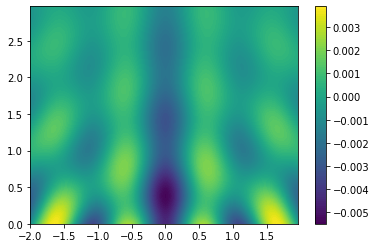

In [217]:
plt.contourf(x, z, y_perp1, 100)
plt.colorbar()

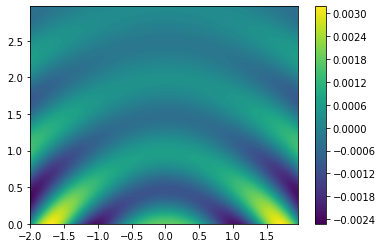

In [218]:
plt.contourf(x, z, y_perp2, 100)
plt.colorbar()

In [219]:
#Graph PLDOS z
def rho_zz(x, y, z, data=data1):
    return 1 + (6*pi*data['c']/(data['w']*data['m1']**2))*Gz(x,y,z,z,data)


In [220]:
start = time.time()

pldos_zz1 = rho_zz(x,0,z, data=data1)
end = time.time()
print('elapsed time Gs: {} seg'.format(end - start))

pldos_zz2 = rho_zz(x,0,z, data=data2)

end = time.time()
print('elapsed time Gs: {} seg'.format(end - start))

pldos_zz3 = rho_zz(x,0,z, data=data3)

end = time.time()
print('elapsed time Gs: {} seg'.format(end - start))

<ipython-input-206-abe69d85e94d>:14: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(G_z_integrand, 0, 1, args=(x,y,z,zp,data,))[0]
elapsed time Gs: 99.45120906829834 seg
<ipython-input-206-abe69d85e94d>:14: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return quad(G_z_integrand, 0, 1, args=(x,y,z,zp,data,))[0]
elapsed time Gs: 315.5753376483917 seg
elapsed time Gs: 415.15429162979126 seg


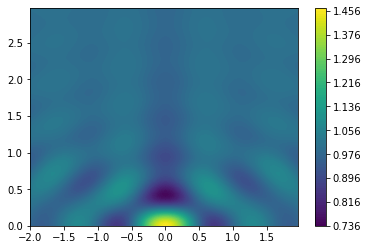

In [221]:
plt.contourf(x, z, pldos_zz1, 100)
plt.colorbar()

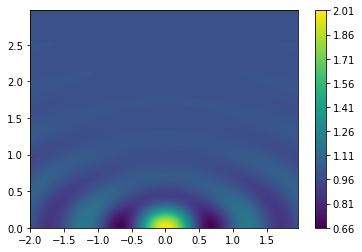

In [222]:
plt.contourf(x, z, pldos_zz2, 100)
plt.colorbar()

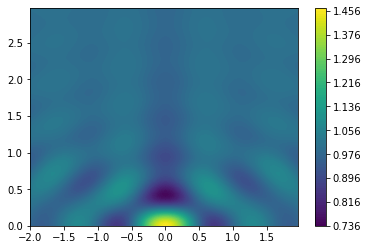

In [223]:
plt.contourf(x, z, pldos_zz3, 100)
plt.colorbar()